In [2]:
# Dota Analysis of wards placed to winrate
# Make a scatter plot where win or loss will be coded as a green or red dot
# This is to easily see a trend of wards placed to win rate
# Game played is on the x axis, Wards Placed is on the y Axis, will have two dots (for radiant and dire side) for each game played
# Data is of lower mmr placed where there will be a greater variance of wards placed
# Also the data will need to be set between a certain amount of time so that extra long games where more wards could be placed dont skew the graph
# My hypothesis is that games where more wards are placed will have a higher average winrate

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json

In [3]:
# Import the data
with open('C:/Users/lizar/Google Drive (erik.sorensen20@houghton.edu)/DotaAnalysis/Wards_to_winrate_pub_data_707d.json','r') as outfile:
    data = json.load(outfile)

In [24]:
len(data)

2397

In [26]:
# Only grab the data that has valid information (that isnt null)
obs_data = []

for match in data:
    try:
        if (match['players'][1]['obs_placed'] != None):
            obs_data.append(match)
    except:
        continue

0.051731330830204425


In [27]:
len(obs_data)
print(len(obs_data)/len(data))

0.051731330830204425


In [59]:
# Count how many observer wards were placed in a match and if the match was won
rad_won = []
rad_wards_placed = []
dire_wards_placed = []
rad_obs_placed_per_player = []
dire_obs_placed_per_player = []

for match in obs_data:
    for i in range(len(match['players'])):
        # Grab the radiant wards
        if (i < 5):
            rad_obs_placed_per_player.append(match['players'][i]['obs_placed'])
            print("rad: " + str(rad_obs_placed_per_player))
        # Grab the dire wards
        if (i >= 5):
            dire_obs_placed_per_player.append(match['players'][i]['obs_placed'])
            print("dire: " + str(dire_obs_placed_per_player))
    
    #Sum up the wards on each side and grab which side won
    rad_wards_placed.append(sum(rad_obs_placed_per_player))
    dire_wards_placed.append(sum(dire_obs_placed_per_player))
    rad_won.append(match['radiant_win'])
    # Reset
    rad_obs_placed_per_player = []
    dire_obs_placed_per_player = []

rad: [2]
rad: [2, 0]
rad: [2, 0, 0]
rad: [2, 0, 0, 6]
rad: [2, 0, 0, 6, 4]
dire: [0]
dire: [0, 5]
dire: [0, 5, 0]
dire: [0, 5, 0, 0]
dire: [0, 5, 0, 0, 1]
rad: [1]
rad: [1, 0]
rad: [1, 0, 0]
rad: [1, 0, 0, 8]
rad: [1, 0, 0, 8, 0]
dire: [0]
dire: [0, 4]
dire: [0, 4, 1]
dire: [0, 4, 1, 0]
dire: [0, 4, 1, 0, 1]
rad: [11]
rad: [11, 0]
rad: [11, 0, 0]
rad: [11, 0, 0, 1]
rad: [11, 0, 0, 1, 0]
dire: [0]
dire: [0, 3]
dire: [0, 3, 0]
dire: [0, 3, 0, 0]
dire: [0, 3, 0, 0, 0]
rad: [0]
rad: [0, 0]
rad: [0, 0, 6]
rad: [0, 0, 6, 0]
rad: [0, 0, 6, 0, 4]
dire: [0]
dire: [0, 7]
dire: [0, 7, 0]
dire: [0, 7, 0, 0]
dire: [0, 7, 0, 0, 0]
rad: [0]
rad: [0, 0]
rad: [0, 0, 5]
rad: [0, 0, 5, 0]
rad: [0, 0, 5, 0, 0]
dire: [0]
dire: [0, 0]
dire: [0, 0, 0]
dire: [0, 0, 0, 0]
dire: [0, 0, 0, 0, 0]
rad: [0]
rad: [0, 0]
rad: [0, 0, 0]
rad: [0, 0, 0, 0]
rad: [0, 0, 0, 0, 1]
dire: [4]
dire: [4, 1]
dire: [4, 1, 0]
dire: [4, 1, 0, 0]
dire: [4, 1, 0, 0, 1]
rad: [0]
rad: [0, 0]
rad: [0, 0, 11]
rad: [0, 0, 11, 0]
rad: [0, 

In [60]:
print(rad_won)

[True, True, True, True, True, False, False, False, False, True, True, True, False, False, False, True, True, True, True, True, True, True, False, True, False, True, True, True, False, False, True, False, True, True, True, True, True, True, False, True, False, True, True, True, True, False, False, True, False, True, True, False, True, True, False, False, False, True, False, True, True, False, True, False, True, False, True, True, True, True, False, False, True, False, True, False, True, True, True, True, True, False, False, False, True, False, True, True, True, False, False, True, False, True, False, False, True, True, False, True, False, False, False, False, True, True, False, True, False, False, True, True, True, True, True, False, False, False, True, True, True, True, True, True]


In [80]:
print(rad_wards_placed)

[12, 9, 12, 10, 5, 1, 11, 5, 0, 9, 10, 5, 7, 3, 2, 10, 13, 10, 0, 10, 8, 13, 8, 11, 1, 8, 8, 10, 10, 8, 9, 14, 5, 3, 10, 9, 4, 11, 12, 11, 10, 11, 12, 2, 11, 1, 6, 10, 1, 11, 11, 0, 9, 13, 0, 1, 0, 7, 0, 11, 6, 9, 1, 10, 13, 8, 8, 7, 10, 5, 0, 6, 13, 10, 2, 8, 10, 9, 10, 6, 8, 9, 6, 4, 11, 3, 2, 9, 8, 5, 4, 9, 3, 7, 9, 10, 12, 7, 5, 9, 5, 0, 5, 10, 9, 4, 9, 8, 12, 10, 5, 2, 12, 2, 4, 11, 8, 0, 5, 5, 1, 3, 12, 13]


In [79]:
print(dire_wards_placed)

[6, 6, 3, 7, 0, 6, 12, 7, 2, 9, 8, 1, 9, 11, 13, 0, 8, 8, 5, 10, 7, 1, 12, 4, 13, 9, 11, 1, 13, 8, 11, 0, 12, 0, 2, 12, 7, 3, 11, 6, 7, 7, 0, 3, 5, 12, 4, 1, 10, 10, 12, 7, 11, 5, 5, 12, 12, 5, 11, 9, 8, 9, 9, 4, 0, 9, 10, 9, 11, 5, 5, 7, 10, 11, 3, 11, 13, 7, 1, 11, 10, 6, 5, 1, 7, 7, 0, 9, 3, 9, 1, 10, 9, 7, 9, 11, 12, 11, 10, 9, 1, 10, 9, 9, 10, 1, 6, 8, 11, 12, 10, 2, 10, 6, 2, 10, 10, 0, 1, 3, 5, 11, 2, 9]


In [81]:
wins = []
losses = []

for i in range(len(rad_won)):
    if (rad_won[i] == True):
        wins.append(rad_wards_placed[i])
        losses.append(dire_wards_placed[i])
    if (rad_won[i] == False):
        wins.append(dire_wards_placed[i])
        losses.append(rad_wards_placed[i])

In [91]:
print('Won games average wards placed: {:.4f}'.format(np.mean(wins)))
print('Loss games average wards placed: {:.4f}'.format(np.mean(losses)))

Won games average wards placed: 8.1371
Loss games average wards placed: 6.1290


In [82]:
match_num = []
for i in range(len(rad_won)):
    match_num.append(i)

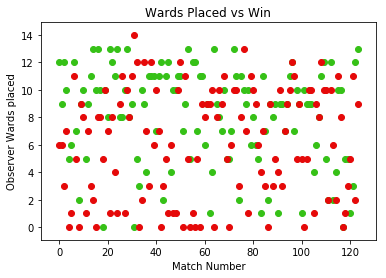

In [83]:
# Plot the data
plt.xlabel('Match Number')
plt.ylabel('Observer Wards placed')
plt.title('Wards Placed vs Win')
plt.scatter(match_num,wins,c='#36c117')
plt.scatter(match_num,losses,c='#e50909')
plt.show()

# Green dots are wins
# Red dots are losses

In [ ]:
# Now give some kind of metric to show the best number of wards placed to get the best winrate